# Impor modul

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
warnings.filterwarnings('ignore')
import graphviz
from IPython.display import Image  
from subprocess import call
from sklearn.metrics import accuracy_score
!pip install pydotplus
import pydotplus
from six import StringIO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=e5ea73d09a2204cb9f1aa8bb97ff0334bc1d49cb6c5a8d3d24f7539d38f10bb1
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


# Data Preprocessing

Impor data

In [2]:
train_path = '/kaggle/input/2023-tragedi-titanic/train.csv'
test_path = '/kaggle/input/2023-tragedi-titanic/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [3]:
train.head()

,ID,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,401,3,0,male,NaN,0,0,8.0500,NaN,S,NaN,NaN,NaN
1,402,3,1,female,22.0,1,0,13.9000,NaN,S,16,NaN,"West Haven, CT"
2,403,3,0,male,NaN,0,0,7.3125,NaN,S,NaN,NaN,NaN
3,404,3,0,male,28.0,2,0,7.9250,NaN,S,NaN,NaN,"Ruotsinphytaa, Finland New York, NY"
4,405,3,0,male,NaN,0,0,6.8583,NaN,Q,NaN,NaN,NaN


In [4]:
test.head()

,ID,pclass,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,1,1,female,45.0,0,1,63.3583,D10 D12,C,7,NaN,"New York, NY"
1,2,3,male,51.0,0,0,7.7500,NaN,S,NaN,NaN,NaN
2,3,2,female,28.0,1,0,24.0000,NaN,C,10,NaN,"Russia New York, NY"
3,4,3,female,NaN,1,0,24.1500,NaN,Q,16,NaN,NaN
4,5,3,male,NaN,0,0,7.7500,NaN,Q,NaN,NaN,NaN


## Isi NULL

### Age

In [5]:
train.isnull().sum()

ID             0
pclass         0
survived       0
sex            0
age          192
sibsp          0
parch          0
fare           1
cabin        699
embarked       2
boat         583
body         820
home.dest    393
dtype: int64

In [6]:
test.isnull().sum()

ID             0
pclass         0
sex            0
age           71
sibsp          0
parch          0
fare           0
cabin        315
embarked       0
boat         240
body         368
home.dest    171
dtype: int64

In [7]:
# Fill null in Age Train
mean_age = train['age'].mean()

train['age'].fillna(value=mean_age, inplace=True)
train['age'] = train['age'].round().astype(int)

train.head()

,ID,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,401,3,0,male,30,0,0,8.0500,NaN,S,NaN,NaN,NaN
1,402,3,1,female,22,1,0,13.9000,NaN,S,16,NaN,"West Haven, CT"
2,403,3,0,male,30,0,0,7.3125,NaN,S,NaN,NaN,NaN
3,404,3,0,male,28,2,0,7.9250,NaN,S,NaN,NaN,"Ruotsinphytaa, Finland New York, NY"
4,405,3,0,male,30,0,0,6.8583,NaN,Q,NaN,NaN,NaN


In [8]:
# Fill null in Age Test
mean_age = test['age'].mean()

test['age'].fillna(value=mean_age, inplace=True)
test['age'] = test['age'].round().astype(int)

test.head()

,ID,pclass,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,1,1,female,45,0,1,63.3583,D10 D12,C,7,NaN,"New York, NY"
1,2,3,male,51,0,0,7.7500,NaN,S,NaN,NaN,NaN
2,3,2,female,28,1,0,24.0000,NaN,C,10,NaN,"Russia New York, NY"
3,4,3,female,30,1,0,24.1500,NaN,Q,16,NaN,NaN
4,5,3,male,30,0,0,7.7500,NaN,Q,NaN,NaN,NaN


### Fare dan Embarked

In [9]:
train.isnull().sum()

ID             0
pclass         0
survived       0
sex            0
age            0
sibsp          0
parch          0
fare           1
cabin        699
embarked       2
boat         583
body         820
home.dest    393
dtype: int64

In [10]:
test.isnull().sum()

ID             0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
cabin        315
embarked       0
boat         240
body         368
home.dest    171
dtype: int64

In [11]:
mode_embarked = train['embarked'].mode()[0]
mean_fare = train['fare'].mean()

train['embarked'].fillna(value=mode_embarked, inplace=True)
train['fare'].fillna(value=mean_fare, inplace=True)

print(mode_embarked)

S


In [12]:
train.isnull().sum()

ID             0
pclass         0
survived       0
sex            0
age            0
sibsp          0
parch          0
fare           0
cabin        699
embarked       0
boat         583
body         820
home.dest    393
dtype: int64

In [13]:
test.isnull().sum()

ID             0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
cabin        315
embarked       0
boat         240
body         368
home.dest    171
dtype: int64

In [14]:
train.head()

,ID,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,401,3,0,male,30,0,0,8.0500,NaN,S,NaN,NaN,NaN
1,402,3,1,female,22,1,0,13.9000,NaN,S,16,NaN,"West Haven, CT"
2,403,3,0,male,30,0,0,7.3125,NaN,S,NaN,NaN,NaN
3,404,3,0,male,28,2,0,7.9250,NaN,S,NaN,NaN,"Ruotsinphytaa, Finland New York, NY"
4,405,3,0,male,30,0,0,6.8583,NaN,Q,NaN,NaN,NaN


## Non-numerik ke numerik

In [15]:
# Gender
genders = {'male': 1, 'female': 0}
train['sex'] = train['sex'].apply(lambda s: genders.get(s))
test['sex'] = test['sex'].apply(lambda s: genders.get(s))

In [16]:
# Embarkment
embarkments = {'U': 0, 'S': 1, 'C': 2, 'Q': 3}
train['embarked'] = train['embarked'].apply(lambda e: embarkments.get(e))
test['embarked'] = test['embarked'].apply(lambda e: embarkments.get(e))

Tes

In [17]:
train = train.loc[:,['survived', 'pclass', 'sibsp', 'parch', 'embarked', 'fare', 'age', 'sex']]
train.describe()

,survived,pclass,sibsp,parch,embarked,fare,age,sex
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,0.376238,2.292629,0.488449,0.353135,1.409241,33.040335,30.017602,0.655666
std,0.484707,0.839656,1.089158,0.780858,0.660198,53.234366,12.807870,0.475412
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,1.000000,7.895800,23.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,1.000000,14.400000,30.000000,1.000000
75%,1.000000,3.000000,1.000000,0.000000,2.000000,31.000000,35.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,3.000000,512.329200,80.000000,1.000000


In [18]:
train['survived']

0      0
1      1
2      0
3      0
4      0
      ..
904    0
905    0
906    1
907    0
908    0
Name: survived, Length: 909, dtype: int64

In [19]:
scaler = MinMaxScaler()
columns = ['pclass', 'sibsp', 'parch', 'embarked', 'fare', 'age', 'sex']

# Normalisasi pada data pelatihan
train_scaled = pd.DataFrame(scaler.fit_transform(train[columns]), columns=columns)
train_scaled['survived'] = train['survived']

# Normalisasi pada data uji menggunakan scaler yang sama dengan yang digunakan pada data pelatihan
test_scaled = pd.DataFrame(scaler.transform(test[columns]), columns=columns)

## Heatmap

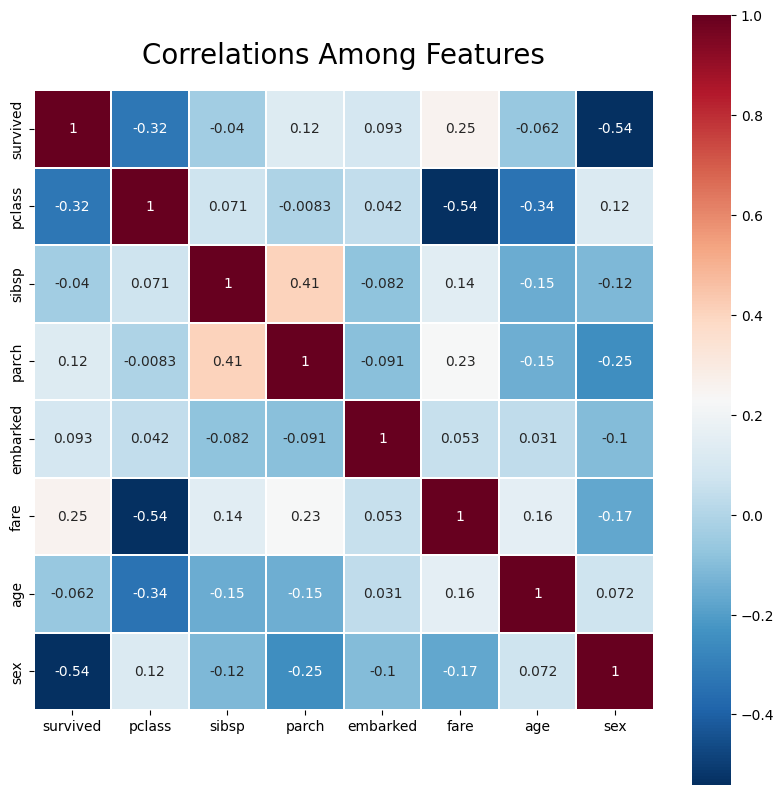

In [20]:
plt.subplots(figsize = (10,10))
data = train.loc[:,['survived','pclass', 'sibsp', 'parch', 'embarked', 'fare', 'age', 'sex']]
sns.heatmap(data.corr(),
            annot=True,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

## Split Data

In [21]:
train_scaled.isnull().sum()

pclass      0
sibsp       0
parch       0
embarked    0
fare        0
age         0
sex         0
survived    0
dtype: int64

In [22]:
train_data, valid_data = train_test_split(train_scaled, test_size=0.2)


In [23]:
X_train = train_data.loc[:,['pclass', 'sibsp', 'parch', 'embarked', 'fare', 'age', 'sex']]
X_valid = valid_data.loc[:,['pclass', 'sibsp', 'parch', 'embarked', 'fare', 'age', 'sex']]
X_test = test_scaled.loc[:,['pclass', 'sibsp', 'parch', 'embarked', 'fare', 'age', 'sex']]

y_train = train_data.loc[:,['survived']]
y_valid = valid_data.loc[:,['survived']]

In [24]:
X_train.describe()

,pclass,sibsp,parch,embarked,fare,age,sex
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,0.651994,0.060351,0.054791,0.202201,0.060759,0.373831,0.667125
std,0.417349,0.133294,0.122535,0.329405,0.088904,0.158141,0.471567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,0.000000
25%,0.500000,0.000000,0.000000,0.000000,0.015412,0.275000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.027050,0.375000,1.000000
75%,1.000000,0.125000,0.000000,0.500000,0.060508,0.437500,1.000000
max,1.000000,1.000000,0.833333,1.000000,1.000000,1.000000,1.000000


In [25]:
X_valid.describe()

,pclass,sibsp,parch,embarked,fare,age,sex
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.00000
mean,0.623626,0.063874,0.075092,0.214286,0.079394,0.380769,0.60989
std,0.430010,0.147340,0.156237,0.333596,0.148928,0.168027,0.48912
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.015399,0.290625,0.00000
50%,1.000000,0.000000,0.000000,0.000000,0.029424,0.375000,1.00000
75%,1.000000,0.125000,0.125000,0.500000,0.061508,0.450000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.875000,1.00000


# Tree

In [26]:
print('{:^10}{:^20}{:^20}'.format('depth', 'train accuracy', 'valid accuracy'))
best_depth = 0
best_accuracy_valid = 0

for i in range(1, 31):
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    clf = clf.fit(X_train, y_train)  # Pastikan X_train dan y_train memiliki jumlah sampel yang sesuai
    y_pred_train = clf.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    
    y_pred_valid = clf.predict(X_valid)
    accuracy_valid = accuracy_score(y_valid, y_pred_valid)
    
    print('{:^10}{:^20.5}{:^20.5}'.format(str(i), str(accuracy_train), str(accuracy_valid)))
    
    if accuracy_valid > best_accuracy_valid:
        best_accuracy_valid = accuracy_valid
        best_depth = i


  depth      train accuracy      valid accuracy   
    1            0.795               0.758        
    2            0.795               0.758        
    3            0.811               0.780        
    4            0.817               0.791        
    5            0.840               0.818        
    6            0.844               0.796        
    7            0.863               0.785        
    8            0.865               0.780        
    9            0.878               0.791        
    10           0.902               0.758        
    11           0.909               0.769        
    12           0.914               0.774        
    13           0.931               0.791        
    14           0.942               0.774        
    15           0.954               0.791        
    16           0.958               0.791        
    17           0.964               0.752        
    18           0.966               0.758        
    19           0.968         

In [27]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=best_depth)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

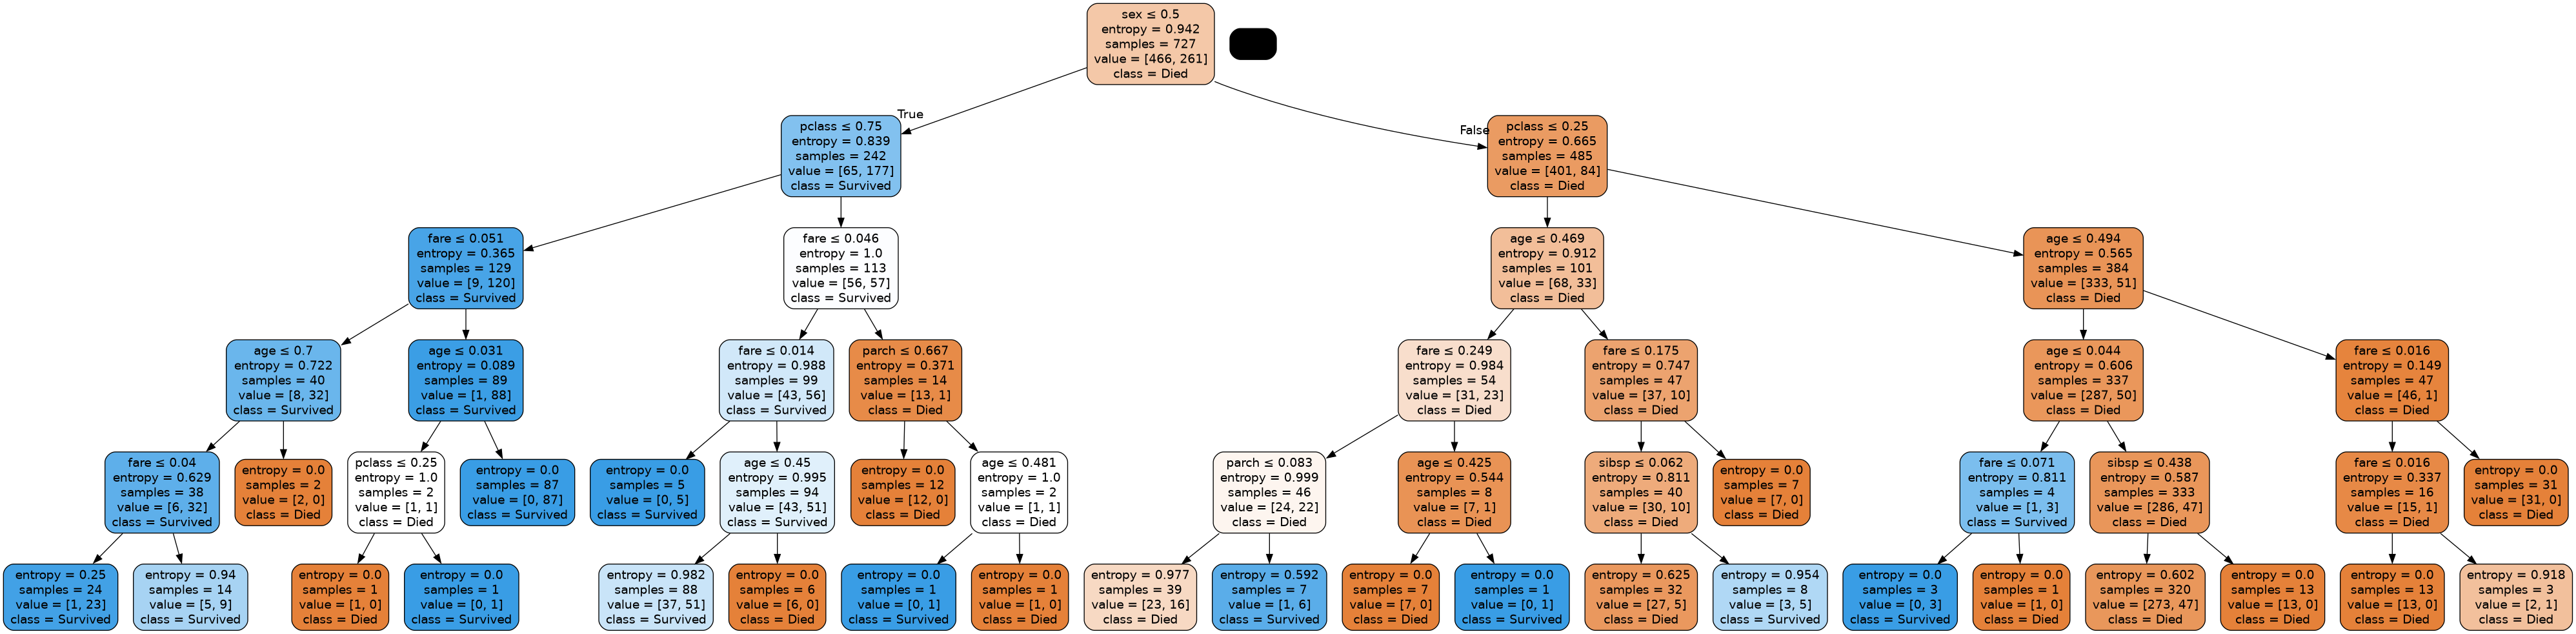

In [28]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = columns, class_names=['Died', 'Survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic_2.png')
Image(graph.create_png())

# Impor CSV

In [29]:
test['survived'] = y_pred
columns_to_export = ['ID', 'survived']
export_data = test[columns_to_export]
export_data.to_csv('coba_submit.csv', index=False)